# <center> Introduction to Persistent Homology with Python</center>

### <center> Sarah Percival </center>
<center> Department of Mathematics and Statistics, University of New Mexico</center>

# Welcome
We introduce the notion of computing persistent homology with Python via several Python packages. Email spercival@unm.edu with questions or comments.

# Goals
* Understand the basics of persistent homology
* Build a filtration and compute persistence with Ripser
* Apply persistence to protein data

# The big picture

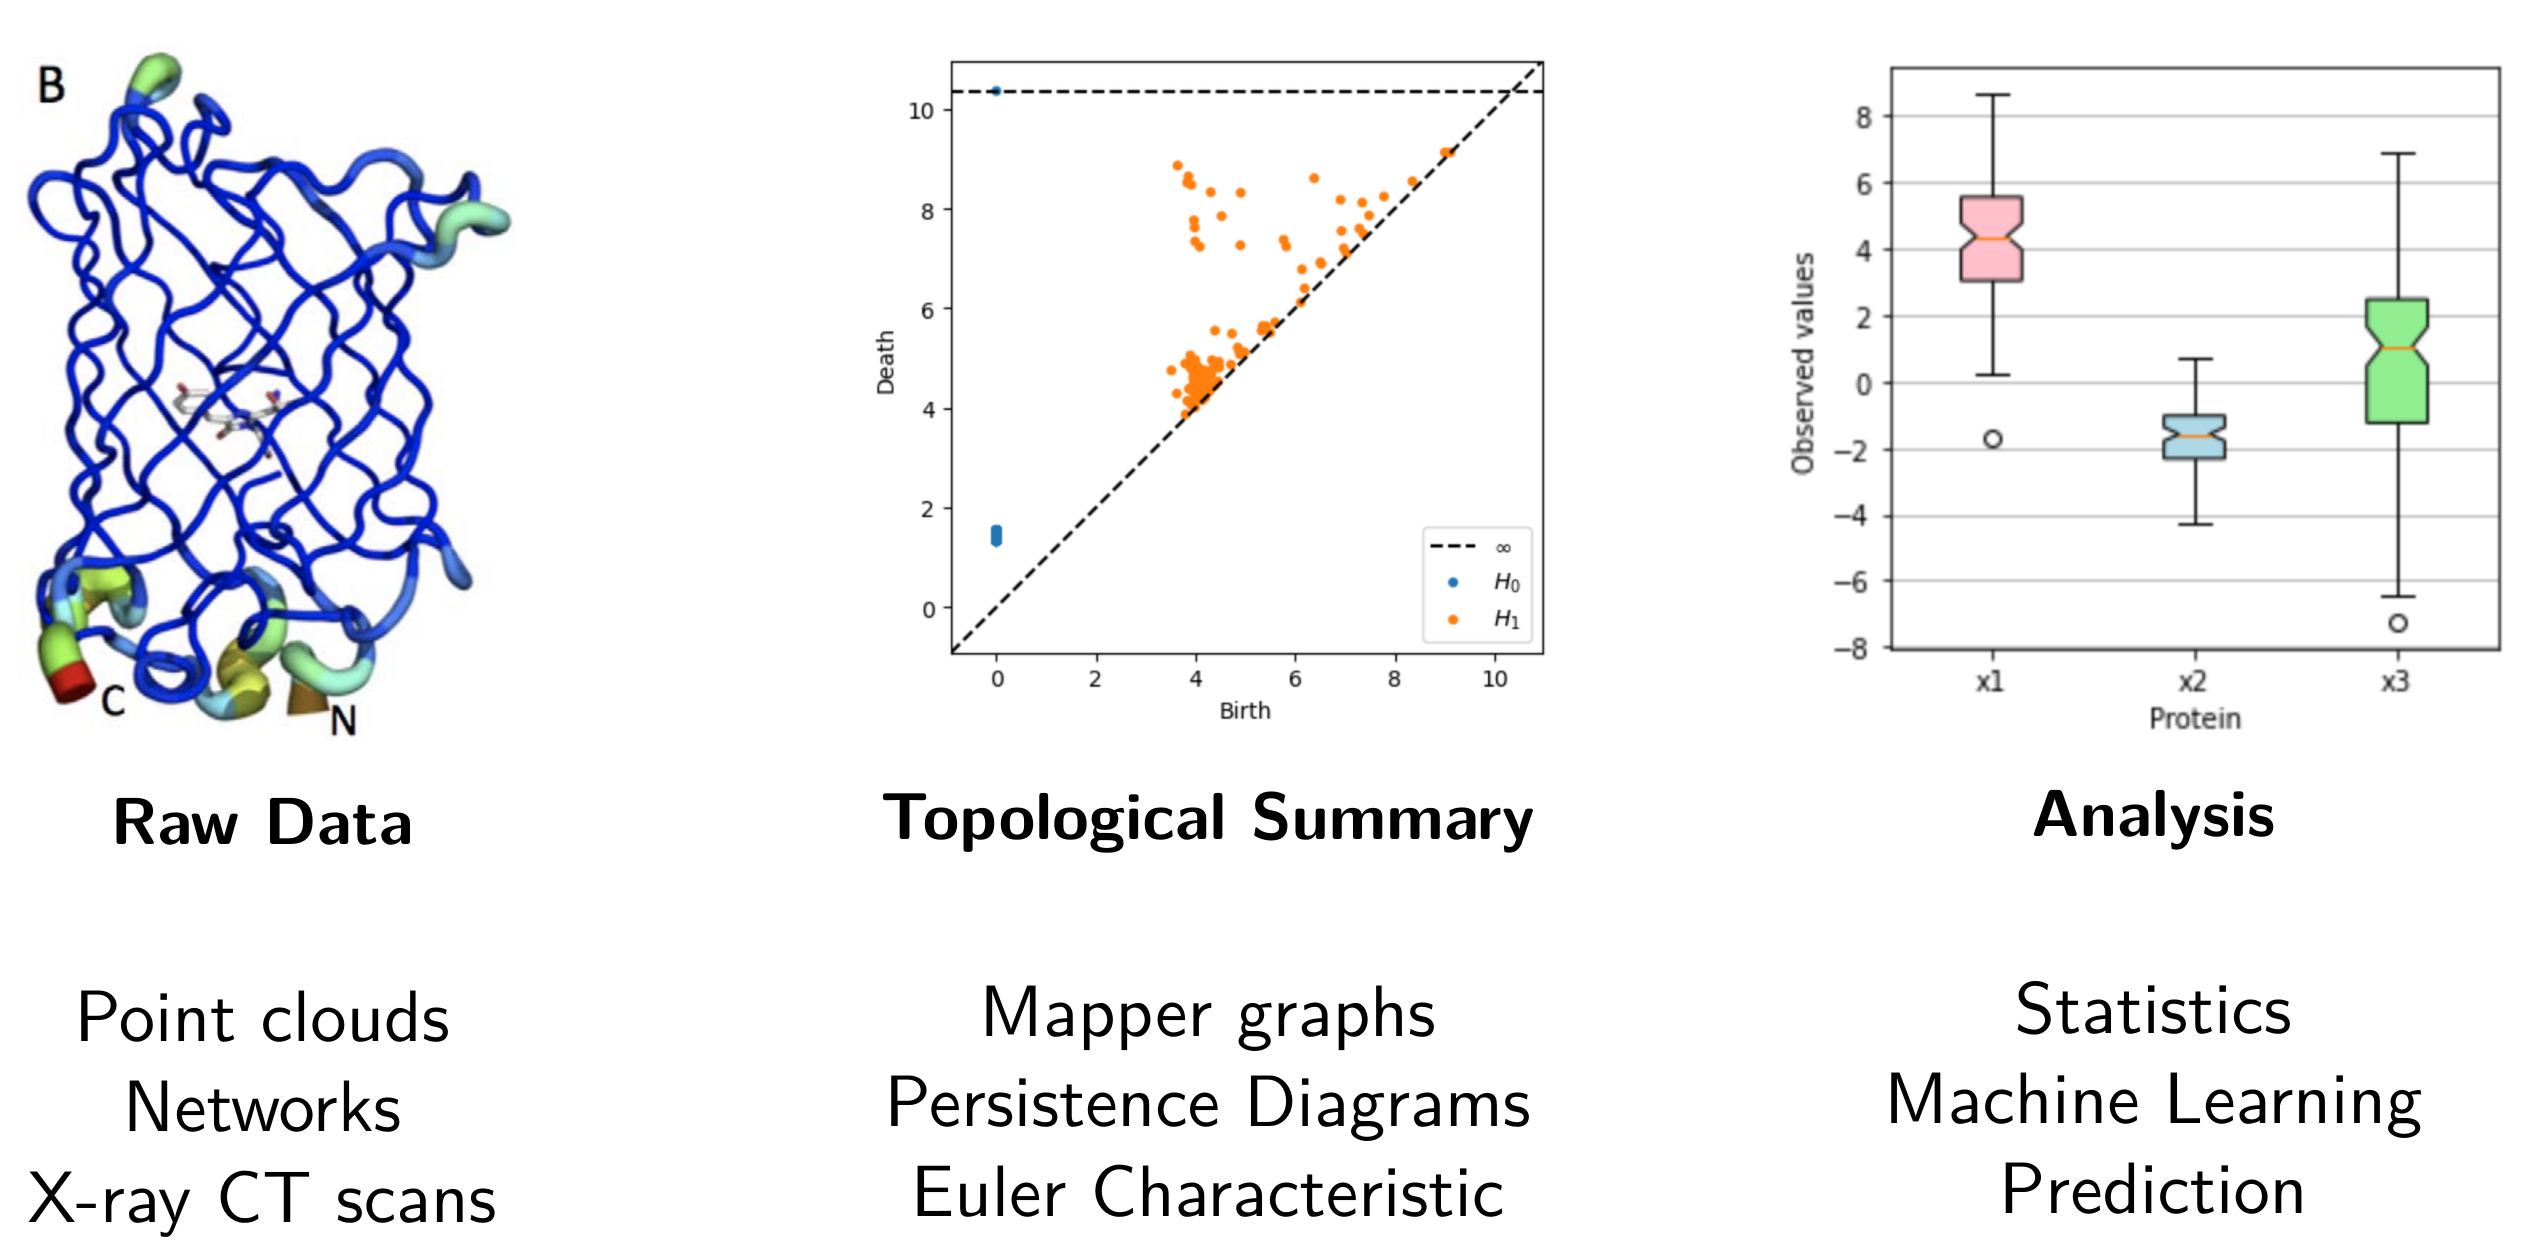

# Our data

Our data in this lecture is a protein molecule. The dataset consists of a set of points in $\mathbb{R}^3$ with each point corresponding to an atom in the molecule.

In [1]:
import pandas as pd

protein = pd.read_csv("AF-W6KDG8-F1-model_v3.pdb", delim_whitespace = True, header = None)

In [2]:
# select the entire backbone
CA_backbone = protein[protein[2].isin(['N','C','CA'])]

# Choose your own adventure
1) If you are comfortable with Python, ignore the rest of the notebook/lecture and spend the rest of class coding your own function to build a Cech filtration from point cloud data and compute persistent homology.

2) Otherwise, let's continue on together.

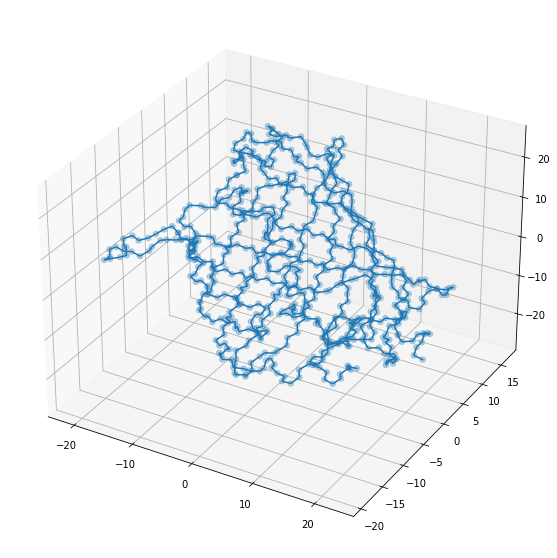

In [3]:
import matplotlib.pyplot as plt

# the atoms are in order in the PDB files, so we connect adjacent atoms
fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

ax.scatter(CA_backbone[6].tolist(), CA_backbone[7].tolist(), CA_backbone[8].tolist(), s=30, alpha=0.3)
ax.plot3D(CA_backbone[6].tolist(), CA_backbone[7].tolist(), CA_backbone[8].tolist())

plt.show()

# Toy Example
First, we will work with a toy example to get comfortable with the software.

In [4]:
# install scikitlean, which is needed for the cell below, and is a useful package to have
# %pip install sklearn

In [5]:
from sklearn import datasets

# produce a noisy circle of point cloud data
X, l = datasets.make_circles(n_samples=(0,10),
                                 noise=0.08,
                                 random_state=1)

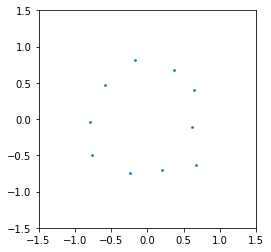

In [6]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1], s = 3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [7]:
# import basic packages
import numpy as np

import matplotlib

In [8]:
# install cython, which is needed for ripser
# %pip install Cython

In [9]:
# install ripser, which computes persistent homology
# %pip install ripser

In [10]:
# install persim, which plots persistence diagrams
# %pip install persim

In [11]:
from ripser import ripser
from persim import plot_diagrams

In [12]:
# if you are having problems with installing or importing ripser and use pip, try upgrading numpy via
# % pip install --upgrade numpy

if you are still having problems and are using a Mac, run the following command in a terminal window:

```$ sudo xcode-select --reset```

The Vietoris-Rips filtration and corresponding persistence diagram of this point cloud looks like this:

![animation.gif](https://github.com/sperciva/Backups/blob/main/Tutorial/circle_example.gif?raw=true)

# Persistence Diagrams

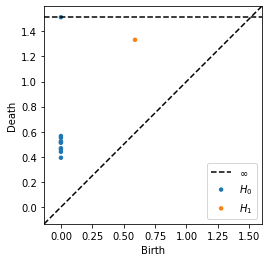

In [13]:
# generate and plot persistence diagram
diagrams = ripser(X)['dgms']
plot_diagrams(diagrams, show=True)

In [14]:
# if you can't see the above plot, run
%matplotlib inline

In [15]:
# we need to close each plot or else they will start plotting on top of each other
plt.close()

The blue points correspond to connected components and the orange points correspond to holes. Let's look at the orange point first.

The (x,y)-coordinates of the orange point are (0.6, 1.3). This means that the hole first appeared at radius=0.6 and disappeared at radius=1.3.

The blue points work in a similar way. All have an x-coordinate of 0, since all connected components that appear are present at radius=0.

Now let's look at some real protein data!

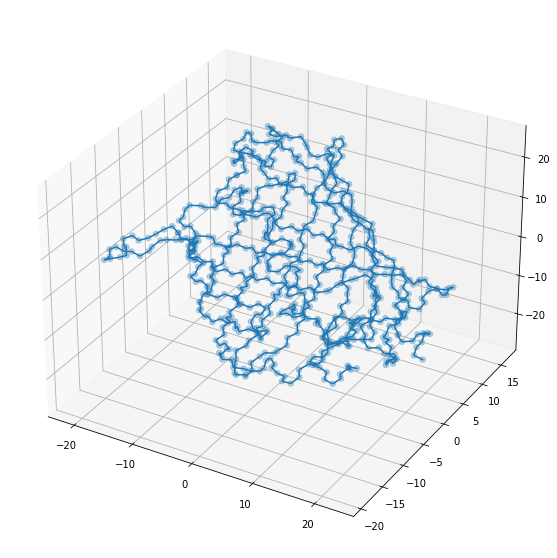

In [16]:
fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

ax.scatter(CA_backbone[6].tolist(), CA_backbone[7].tolist(), CA_backbone[8].tolist(), s=30, alpha=0.3)
ax.plot3D(CA_backbone[6].tolist(), CA_backbone[7].tolist(), CA_backbone[8].tolist())

plt.show()

In [17]:
# if you can't see the above plot, run
from mpl_toolkits.mplot3d import Axes3D

In [18]:
plt.close()

Let's apply persistence to this backbone. What does this look like?

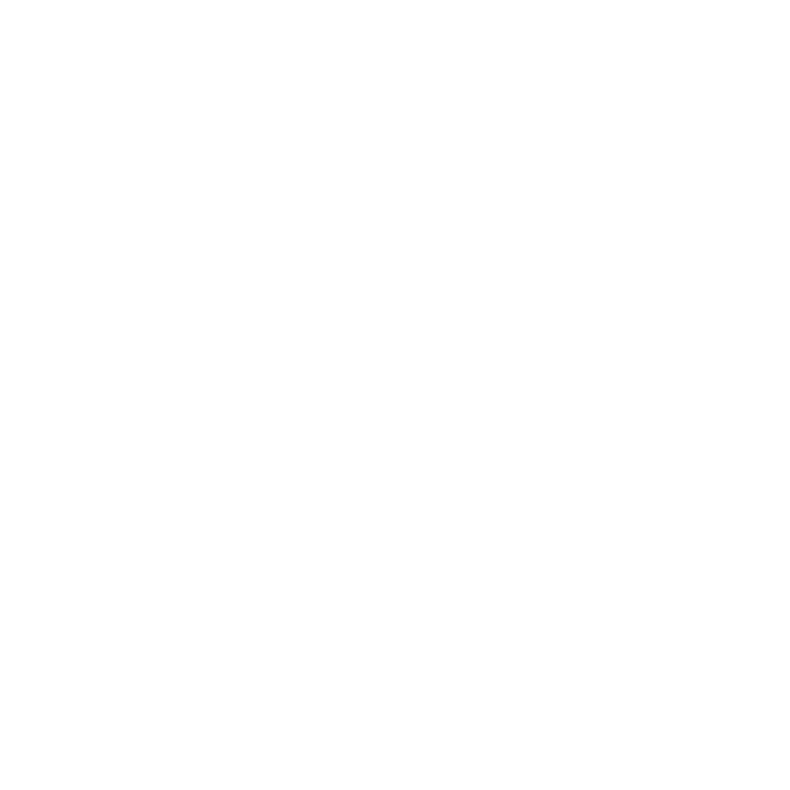

Cool! We can definitely see the barrel-like structure of the protein backbone. Here is what the persistence diagram looks like:

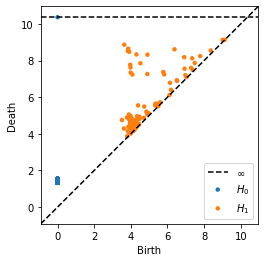

In [19]:
diagram_protein = ripser(np.array(CA_backbone[[6,7,8]]))['dgms']
plot_diagrams(diagram_protein, show=True)

In [20]:
plt.close()

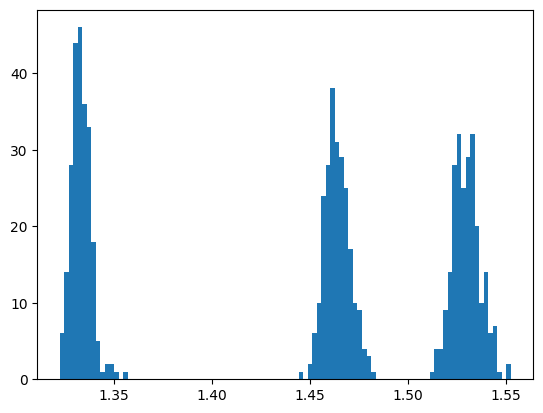

In [21]:
# show distribution of death times of H0 of backbone
plt.figure(4)
plt.hist(diagram_protein[0][0:-1,1], bins = 100)
plt.show()

In [22]:
plt.close()

# Bottleneck distance

In [23]:
# install gudhi, which is needed for distance functions
# %pip install gudhi

Let's look at a toy example to compare persistence diagrams.

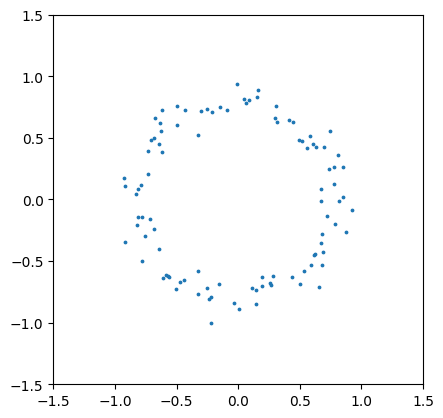

In [24]:
# produce a noisy circle of point cloud data
X, l = datasets.make_circles(n_samples=(0,100),
                                 noise=0.08,
                                 random_state=1)

plt.figure(0)
plt.scatter(X[:,0],X[:,1], s = 3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

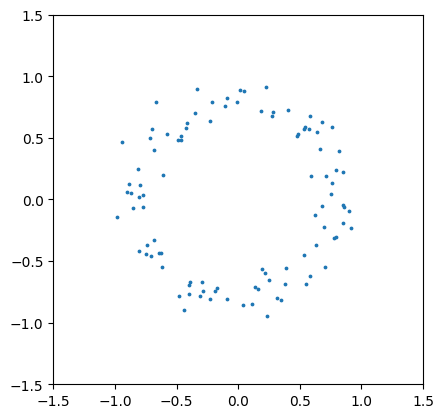

In [25]:
# produce a second noisy circle of point cloud data
X2, l2 = datasets.make_circles(n_samples=(0,100),
                                 noise=0.1,
                                 random_state=2)

plt.figure(0)
plt.scatter(X2[:,0],X2[:,1], s = 3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

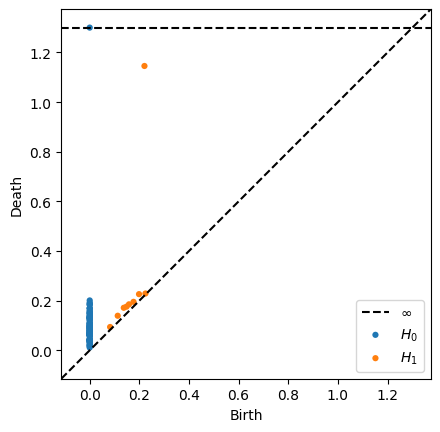

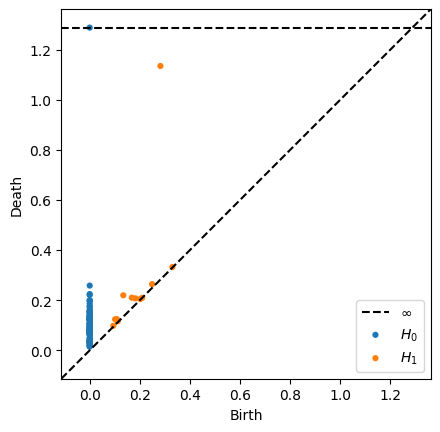

In [26]:
# compute persistence diagrams for each dataset
diagrams_circle1 = ripser(X)['dgms']
plot_diagrams(diagrams_circle1, show=True)

diagrams_circle2 = ripser(X2)['dgms']
plot_diagrams(diagrams_circle2, show=True)

In [27]:
# extract the persistence diagram for each dimension
circle1_dim0 = diagrams_circle1[0]
circle1_dim1 = diagrams_circle1[1]

circle2_dim0 = diagrams_circle2[0]
circle2_dim1 = diagrams_circle2[1]

In [28]:
import gudhi

gudhi.bottleneck_distance(circle1_dim1, circle2_dim1)

0.06170707941055298

Gudhi has a parameter that speeds up computation at the cost of only getting an approximation of the bottleneck distance.

In [29]:
gudhi.bottleneck_distance(circle1_dim1, circle2_dim1, 0.01)

0.053727177597941086

In [30]:
gudhi.bottleneck_distance(circle1_dim1, circle2_dim1, 0.05)

0.041013066457633474

In [31]:
gudhi.bottleneck_distance(circle1_dim1, circle2_dim1, 0.1)

0.09447899487790636

# Timing

You can use Python to time how long it takes for each cell to run.

In [32]:
%%time

gudhi.bottleneck_distance(circle1_dim1, circle2_dim1)

CPU times: user 501 µs, sys: 5 µs, total: 506 µs
Wall time: 521 µs


0.06170707941055298

CPU time is how long your CPU was running your code.

Wall time is the actual time taken for the cell to run.

In [33]:
%%time

import time
time.sleep(1)

CPU times: user 1.41 ms, sys: 1.53 ms, total: 2.94 ms
Wall time: 1 s


In the above cell, it only takes the CPU ~1 ms to execute the code, but the wall time is 1 s

There is another tool, %%timeit, which repeats the timing multiple times to reduce effects of other processes happening on your computer. This will take longer to run than just %time.

In [34]:
%%timeit
gudhi.bottleneck_distance(circle1_dim1, circle2_dim1)

394 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Notice that if you run %time multiple times, the timings will have more variation than running %%time multiple times.

We can use timing to see how slow computing higher dimensional homology is.

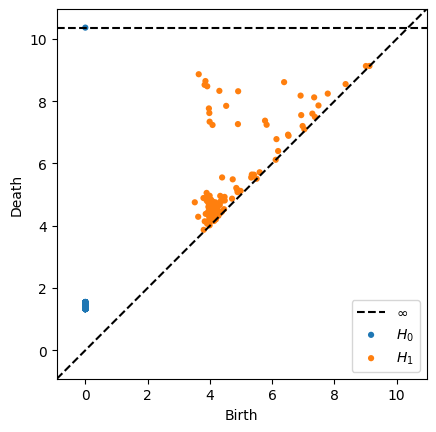

CPU times: user 975 ms, sys: 76.7 ms, total: 1.05 s
Wall time: 992 ms


In [35]:
%%time

# by default, Ripser only computes 0 and 1 dimensional homology.
diagram_protein = ripser(np.array(CA_backbone[[6,7,8]]))['dgms']
plot_diagrams(diagram_protein, show=True)

In [38]:
CA_backbone[[6,7,8]][0:100]

6       7       8
0    12.424  -0.957 -20.746
1    11.638  -1.841 -19.858
2    12.612  -2.767 -19.150
8    12.362  -3.117 -17.889
9    13.182  -4.084 -17.147
..      ...     ...     ...
230  -5.807 -12.044  -1.354
237  -5.372 -12.243  -2.593
238  -6.073 -11.756  -3.768
239  -5.180 -11.746  -4.994
241  -5.380 -10.759  -5.856

[100 rows x 3 columns]

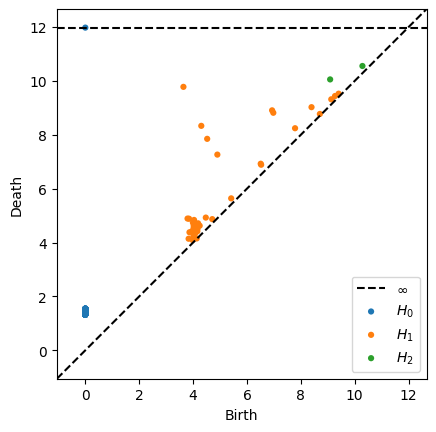

CPU times: user 2.75 s, sys: 204 ms, total: 2.96 s
Wall time: 3.04 s


In [40]:
%%time

diagram_protein = ripser(np.array(CA_backbone[[6,7,8]][0:300]), maxdim=2)['dgms']
plot_diagrams(diagram_protein, show=True)

# Representative cocycles

Persistent cohomology is often faster to compute than persistent homology, and the persistence barcodes coincide. We will now use code from the Ripser.py documentation, found here: https://ripser.scikit-tda.org/en/latest/notebooks/Representative%20Cocycles.html

We use functions in Python for pieces of code we want to call later.

In [41]:
def drawLineColored(X, C):
    for i in range(X.shape[0]-1):
        plt.plot(X[i:i+2, 0], X[i:i+2, 1], c=C[i, :], linewidth = 3)

def plotCocycle2D(D, X, cocycle, thresh):
    """
    Given a 2D point cloud X, display a cocycle projected
    onto edges under a given threshold "thresh"
    """
    #Plot all edges under the threshold
    N = X.shape[0]
    t = 1-np.linspace(0, 1, 10)
    c = plt.get_cmap('Greys')
    C = c(np.array(np.round(np.linspace(0, 255, len(t))), dtype=np.int32))
    C = C[:, 0:3]

    edges_drawn = 0
    for i in range(N):
        for j in range(i+1, N):
            if D[i, j] <= thresh:
                Y = np.zeros((len(t), 2))
                Y[:, 0] = X[i, 0] + t*(X[j, 0] - X[i, 0])
                Y[:, 1] = X[i, 1] + t*(X[j, 1] - X[i, 1])
                drawLineColored(Y, C)
                edges_drawn += 1
    #Plot cocycle projected to edges under the chosen threshold
    for k in range(cocycle.shape[0]):
        [i, j, val] = cocycle[k, :]
        if D[i, j] <= thresh:
            [i, j] = [min(i, j), max(i, j)]
            a = 0.5*(X[i, :] + X[j, :])
            plt.text(a[0], a[1], '%g'%val, color='b')
    #Plot vertex labels
    for i in range(N):
        plt.text(X[i, 0], X[i, 1], '%i'%i, color='r')
    plt.axis('equal')
    return edges_drawn

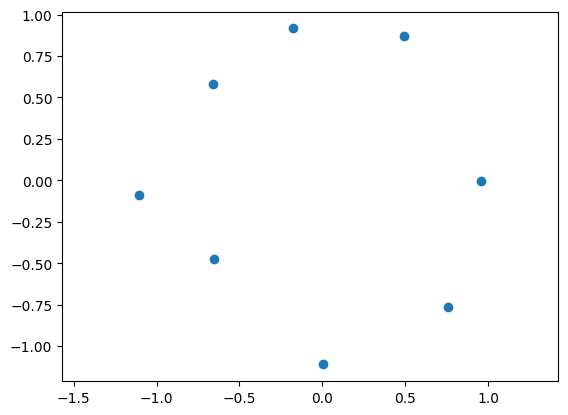

In [42]:
N = 8
np.random.seed(2)
t = np.linspace(0, 2*np.pi, N+1)[0:N]
x = np.array([np.cos(t), np.sin(t)]).T
x += np.random.randn(x.shape[0], 2)*0.1

plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()

In [44]:
# let's use Z/17Z coefficients for fun
result = ripser(x, coeff=17, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

Find the index of the maximum persistence point in the diagram and highlight that point with a black x. This is the point whose representative cocycle we will examine.

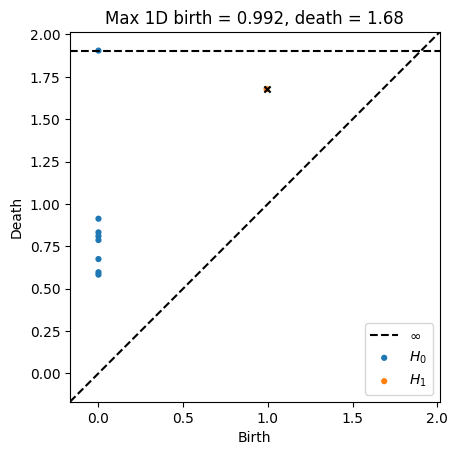

In [45]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

Now we examine the cocycle, drawing edges with length less than or equal to the death time. We will display the indices of vertices in red and the value of cocycle on edges in blue. Edge orientations are drawn as shades of gray, where the edge is oriented from black to white. If an edge is not labeled, it means the cocycle evaluates to zero on that edge.

Remember that a cocycle is a collection of 1-simplices that, if removed, would break the cycle in our data set. 

[[ 1  0  1]
 [ 2  0  1]
 [ 7  1 16]]


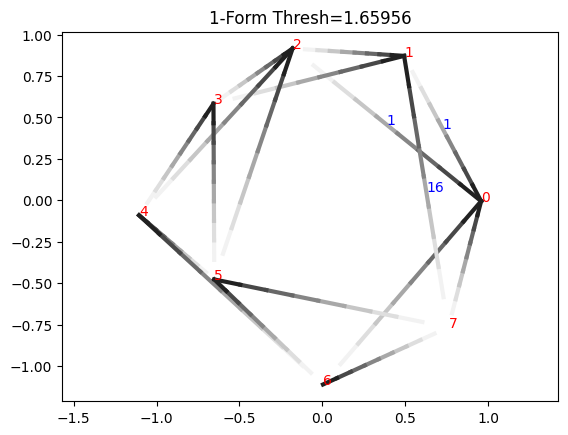

In [51]:
cocycle = cocycles[1][idx]
print(cocycle)
thresh1 = dgm1[idx, 1] + 0.01 #Project cocycle onto edges less than or equal to death time
thresh2 = edges_sorted[np.argmin(np.abs(edges_sorted-thresh1))-1]
plotCocycle2D(D, x, cocycle, thresh2)
plt.title("1-Form Thresh=%g"%thresh2)
plt.show()